# This is a scratch notebook


Here are the imports we are using

In [1]:
# initial importing of libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import bs4
import requests_html
import json
import cv2
import csv
import time
import concurrent.futures
import random


#sklearn imports

from sklearn.decomposition import PCA
from sklearn import preprocessing

#importing the scripts I made
import create_pitching_dataframes
import data
import kmeansGPU
import analysis
import pca_cov
import linear_regression_gpu






In [2]:
#['will_t_0_npy','will_t_1_npy','will_t_3_npy']

test_clips_dfs_list = create_pitching_dataframes.load_clips_to_df(['will_t_2_npy'],crop_the_frames=False)


In [3]:
test_clips_df = pd.concat(test_clips_dfs_list)

In [ ]:
test_clips_df_pixels = test_clips_df.drop(labels = ['camera_type','session_number','pitch_number','pitcher',
                                                    'pitch_type','frame_num'],axis =1)


# croping pixels some more to try and save memory spaace

In [ ]:
pixels_unflat = test_clips_df_pixels.values.reshape(6300,350,390)

In [ ]:
plt.imshow(pixels_unflat[15,:,:], cmap='Greys')

Normalizing and scaling data before preforming PCA

In [ ]:
test_clips_df_pixels.head()


In [ ]:
test_clips_df_pixels_normalized_my = create_pitching_dataframes.normalize_data_globaly(test_clips_df_pixels.values)

In [ ]:
test_clips_df_pixels_normalized_my = pd.DataFrame(test_clips_df_pixels_normalized_my)
test_clips_df_pixels_normalized_my.head()

In [ ]:
scaler_minmax = preprocessing.MinMaxScaler()

In [ ]:
scaler_minmax.fit(test_clips_df_pixels)
minmax_scaled_pixels = scaler_minmax.transform(test_clips_df_pixels)
minmax_scaled_pixels_df = pd.DataFrame(minmax_scaled_pixels)
minmax_scaled_pixels_df.head()



In [ ]:
minmax_scaled_pixels_df.info()

In [ ]:
#changing pitch type from string to numeric
# pitch_type_dict = {'fastball' : 1, 'changeup' : 2, 'slider' : 3}
# test_clips_df_pixels['pitch_type'] = [pitch_type_dict[pitch_type] for pitch_type in  test_clips_df['pitch_type'].values]
#

# Setting up data to be used in my self made pca python class

In [ ]:
pca_clips = pca_cov.PCA_COV(minmax_scaled_pixels_df)


In [ ]:
pca_clips.pca(vars = minmax_scaled_pixels_df.columns)


# Testing the PCA methods now



In [ ]:
pca_4096 = PCA(n_components= 'mle', svd_solver='full' )


In [ ]:
pics_64_64 = pca_4096.fit_transform(minmax_scaled_pixels)

In [16]:
aaa = np.load('test_5_slider_1_Wc1.npy')

# Now trying different k means approaches



In [ ]:
test_clips_df_pixels = []
for data_frame in test_clips_dfs_list:
    test_clips_df_pixels.append(data_frame.drop(labels = ['camera_type','session_number','pitch_number','pitcher']))



In [2]:
#this is a function to reshape images:
def unflatten_images(array_of_images,img_width, img_height):
    total_img_size = img_height*img_width

    #make sure image size is correct
    if array_of_images.shape[1] != total_img_size:
        print(f'Error The shape of {img_width} x {img_height} is not the size of the images in the array of '
              + f'{array_of_images.shape[1]}')
        raise ValueError

    reshaped_img_array = array_of_images.reshape(array_of_images.shape[0],img_width,img_height)
    return reshaped_img_array

normalizing my data and trying to cluster it

In [3]:
def normalize_data_globaly(matrix,method = 'min-max'):
    '''

    :param matrix: (ndarray)
    :param method: (string) wither mean or min-max to chose the type of global normalization
    :return normalized matrix: (ndarray) the normalized matrix
    '''
    if method == 'mean':
        normalized_matrix = (matrix - matrix.mean())/matrix.std()
    elif method == 'min-max':
        normalized_matrix = (matrix - matrix.min())/(matrix.max()-matrix.min())
    else:
        print(f'Error method must be mean or min-max!!\nCurrently it is {method}')
        raise ValueError

    return normalized_matrix

Now I will write my scratch code below.

In [4]:
will_t_0_changeup_1_Wc1_df = pd.read_csv('data/will_t_0/will_t_0_changeup_1_Wc1.csv', header=None)#
will_t_0_changeup_1_Wc1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 307200 entries, 0 to 307199
dtypes: int64(307200)
memory usage: 351.6 MB


In [5]:
# headers =  ['clip_name']
# for pixel in range(0,307200):
#     headers.append(f'p{pixel}')

# data_list = []

# with open(f'data/CardCapture_0_Wc1.csv', 'r') as f:
#     reader = csv.reader(f)
#     data_list = list(reader)
#
#
# data_list_h = data_list.insert(0,headers)
#
# with open(f'data/CardCapture_0_Wc1.csv', 'w') as f:
#     writer = csv.writer(f)
#     writer.writerows(data_list)

In [6]:
will_t_0_changeup_1_Wc1_df = pd.read_csv('data/will_t_0/will_t_0_changeup_1_Wc1.csv', header=None)#
will_t_0_changeup_1_Wc1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 307200 entries, 0 to 307199
dtypes: int64(307200)
memory usage: 351.6 MB


In [7]:
will_t_0_changeup_1_Wc1_df.head()

0       1       2       3       4       5       6       7       8       \
0     164     164     140     128     119     128     141     147     143   
1     165     165     140     128     118     128     142     147     143   
2     175     174     144     134     124     136     149     152     150   
3     173     172     145     134     123     136     150     155     151   
4     175     173     144     133     123     136     148     155     150   

   9       ...  307190  307191  307192  307193  307194  307195  307196  \
0     136  ...      55      57      56      56      56      62      64   
1     135  ...      55      56      56      56      59      63      65   
2     142  ...      60      65      59      64      67      71      72   
3     143  ...      63      66      61      62      64      71      71   
4     142  ...      59      66      59      61      64      71      71   

   307197  307198  307199  
0      68      66      61  
1      66      66      61  
2      73      73      67  
3      75      74      68  
4      72      72      68  

[5 rows x 307200 columns]

In [8]:
# CardCapture_0_fastball_1_1_wc1_frame_1 = cardcap_0_wc1_df.iloc[0,:]
#
#
# Will_0_changeup_1_Wc1_flatten_array = Will_0_changeup_1_Wc1_series.iloc[1:]
# CardCapture_0_fastball_1_1_wc1_array = CardCapture_0_fastball_1_1_wc1_df.to_numpy()
# CardCapture_0_fastball_1_1_wc1_array = CardCapture_0_fastball_1_1_wc1_array.astype('float')
will_t_0_changeup_1_Wc1_array = will_t_0_changeup_1_Wc1_df.to_numpy()

In [9]:
will_t_0_changeup_1_Wc1_frames = unflatten_images(will_t_0_changeup_1_Wc1_array,480,640)

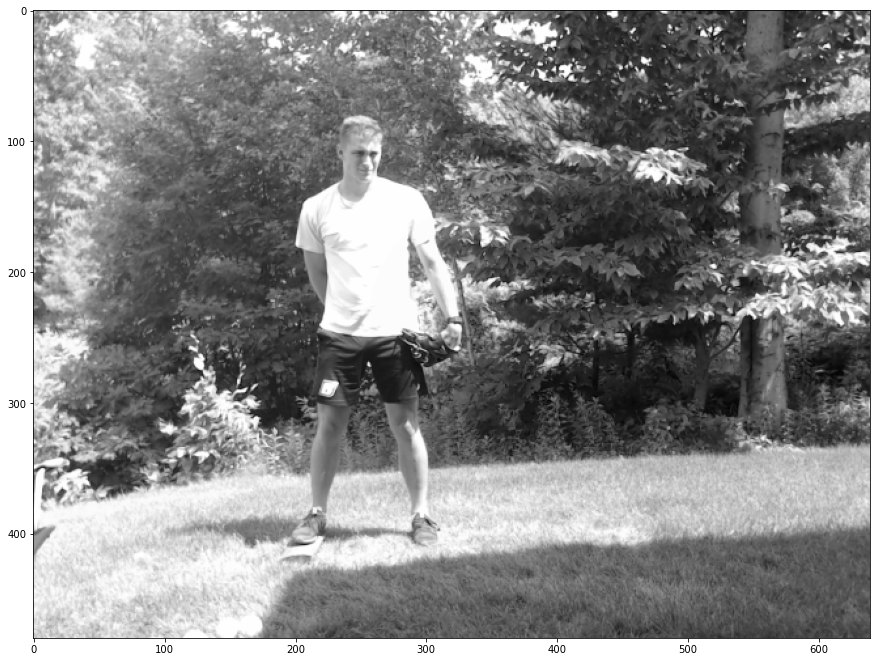

In [10]:
plt.figure(figsize=(15,15))
plt.imshow(will_t_0_changeup_1_Wc1_frames[10,:],  cmap='gray')
plt.show()

In [11]:
normalized_will_t_0_changeup_1_Wc1_df = pd.DataFrame(normalize_data_globaly(will_t_0_changeup_1_Wc1_df.values, method = 'mean'))

Creating a function to crop frames.

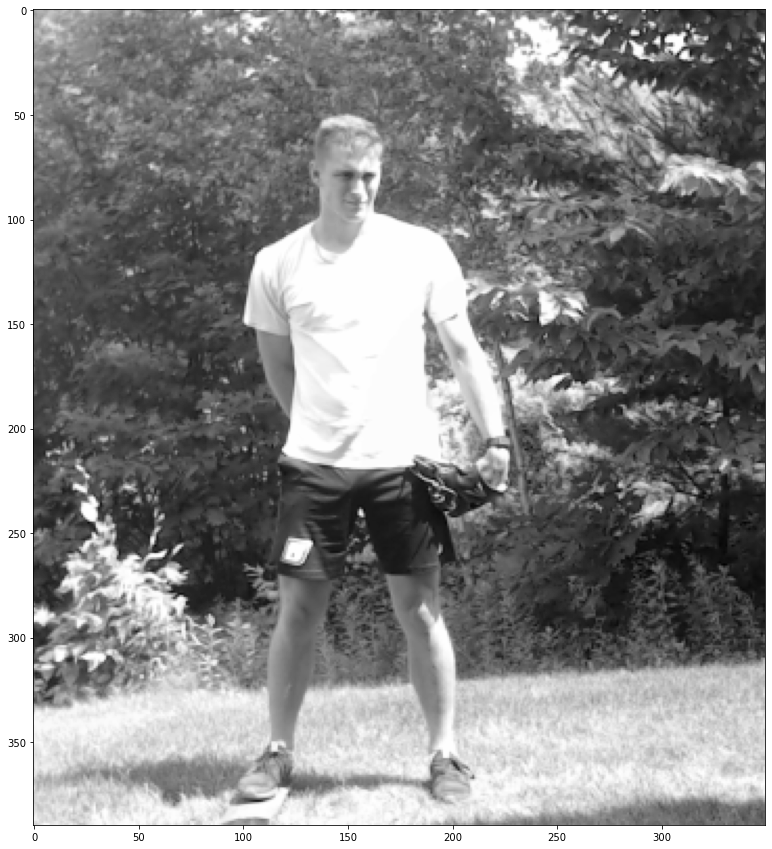

In [12]:
def crop_frames(frames_matrix,top_left_corner,bottom_right_corner):

    #check to make sure frames matrix is 3 dimensions
    if frames_matrix.ndim != 3:
        print(f'Error frame matrix needs to be 3D!!! (frame,frame width, frame height)')
        raise ValueError

    #check to make sure size is ok:
    cropped_frames_matrix = frames_matrix[:,top_left_corner[1]:bottom_right_corner[1],
                            top_left_corner[0]:bottom_right_corner[0]]

    return cropped_frames_matrix


test_crop = crop_frames(unflatten_images(normalized_will_t_0_changeup_1_Wc1_df.to_numpy(),480,640)
                        ,(100,30),(450,420))
plt.figure(figsize=(15,15))
plt.imshow(test_crop[10,:],  cmap='gray')
plt.show()

In [13]:
def display_clip(frames_matrix,img_width, img_height,number_of_frames = (4,4),crop_the_frames = False,
                    top_left_corner=(0,0),bottom_right_corner=(600,600)):


        #unflatten the frames matrix
        frames_matrix = unflatten_images(frames_matrix,img_width,img_height)

        #crop frames if needed
        if crop_the_frames:
            frames_matrix = crop_frames(frames_matrix,top_left_corner,bottom_right_corner)


        total_num_frames_displayed = number_of_frames[0] * number_of_frames[1]

        frames_chosen_to_display = np.random.choice(np.arange(frames_matrix.shape[0]),total_num_frames_displayed,replace=False)

        #create the subplot for the frames
        fig,axes = plt.subplots(number_of_frames[0],number_of_frames[1], figsize=(20,20))

        for frame ,ax in zip(frames_chosen_to_display,axes.flatten()):
            ax.imshow(frames_matrix[frame,:,:],  cmap='gray')

        plt.show()


# display_clip(normalized_will_t_0_changeup_1_Wc1_df.to_numpy(),480,640)


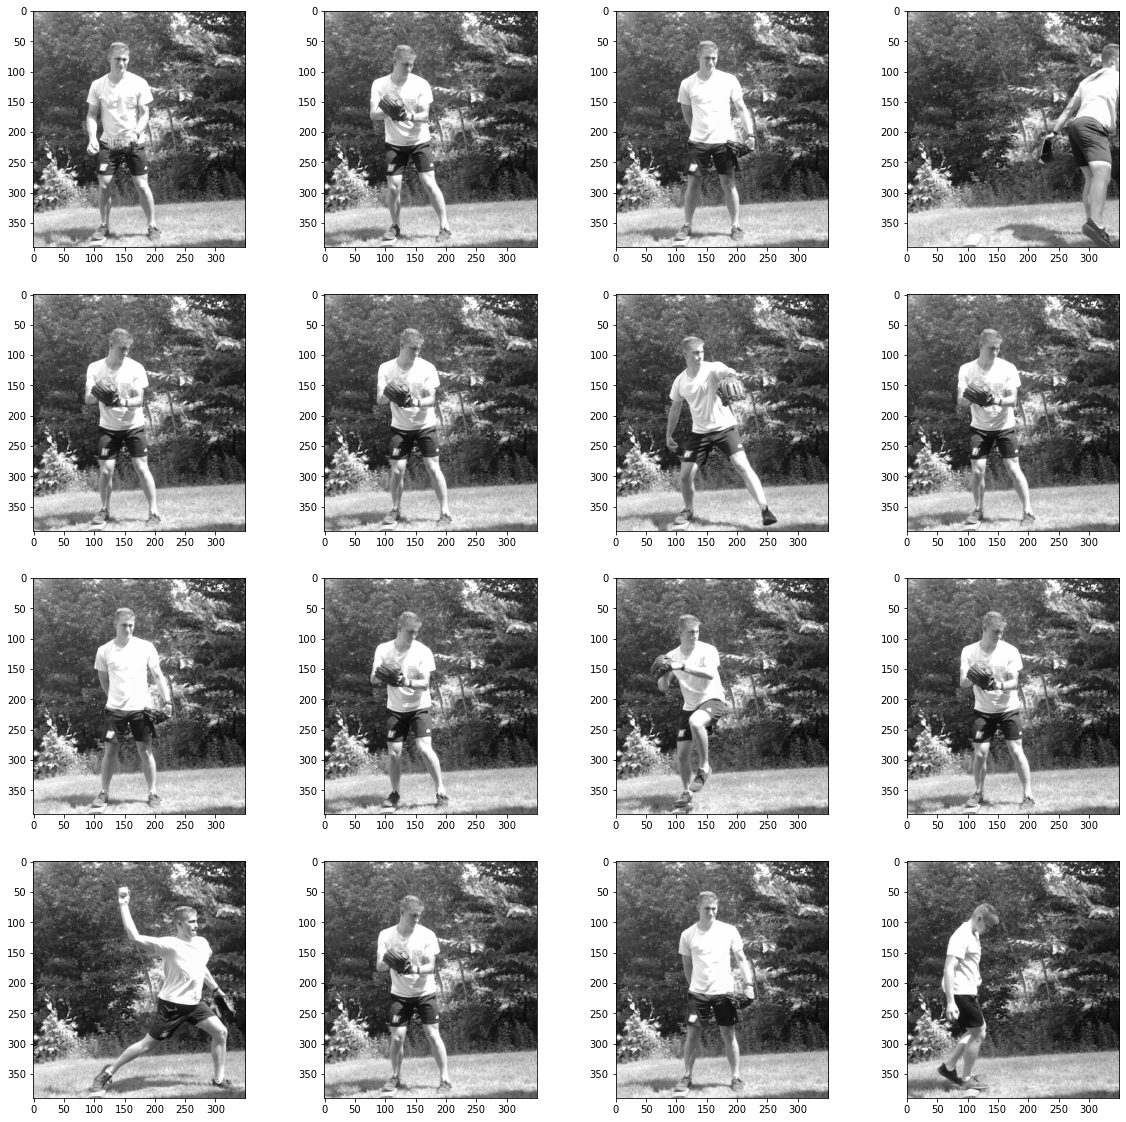

In [14]:
display_clip(normalized_will_t_0_changeup_1_Wc1_df.to_numpy(),480,640,crop_the_frames=True,top_left_corner= (100,30),
             bottom_right_corner=(450,420))

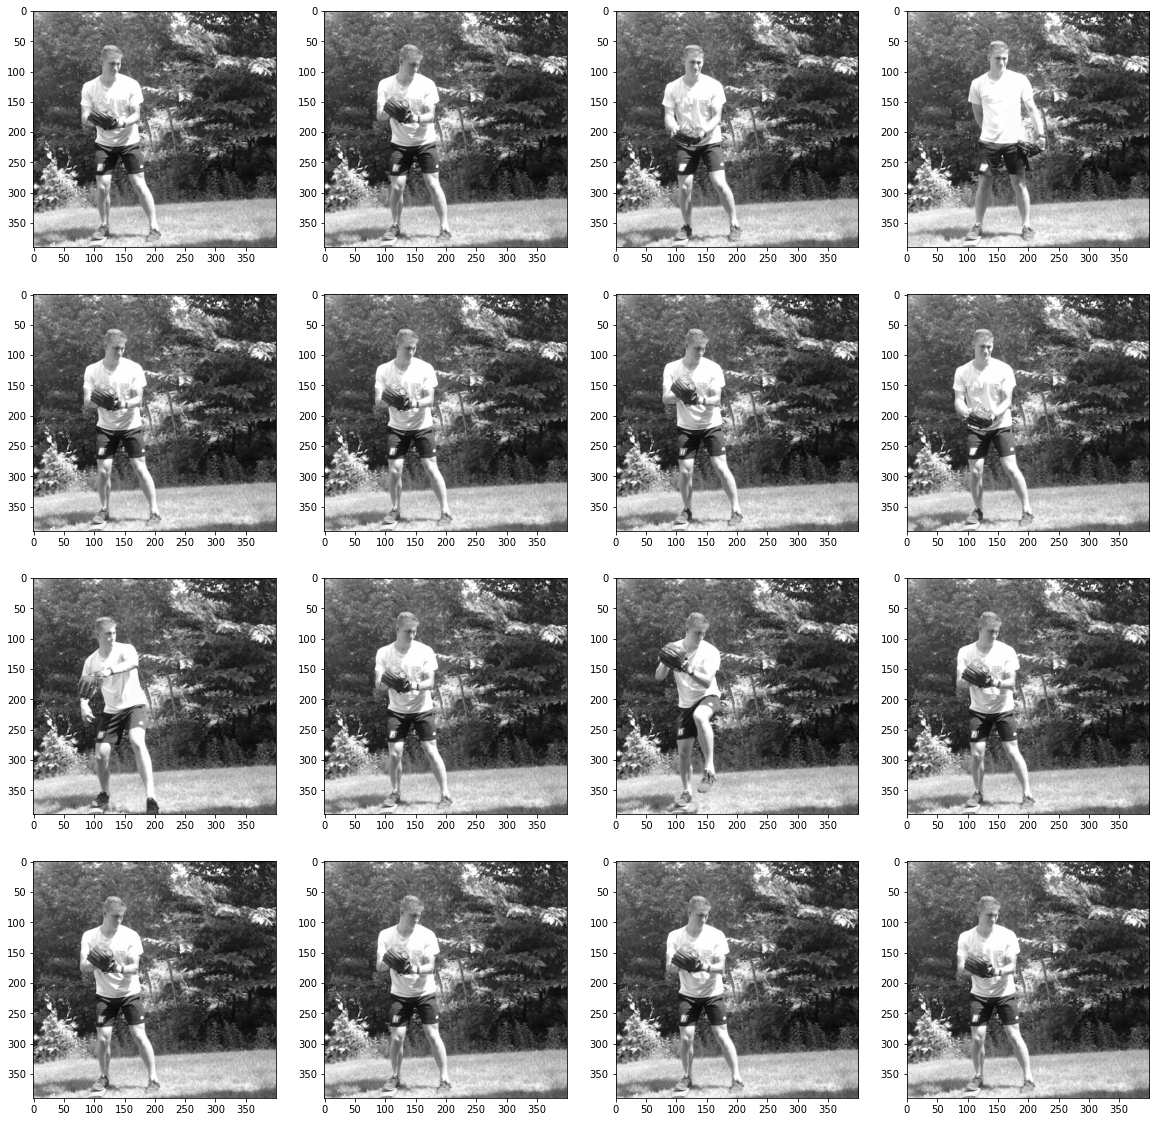

In [15]:
display_clip(normalized_will_t_0_changeup_1_Wc1_df.to_numpy(),480,640,crop_the_frames=True,top_left_corner= (100,30),
             bottom_right_corner=(500,420))



Now I am going to write a function to connect all the data sets (each clip) together into one frame

In [21]:
def concurrent_load_data(data_path,img_width = 480, img_height = 640,crop_the_frames = True,
                    top_left_corner=(100,30),bottom_right_corner=(450,420)):


    #load in the clip
    clip_df = pd.read_csv(data_path)

    frames_matrix = clip_df.values

    #crop the clip if needed
    if crop_the_frames:

        #unflatten the frames matrix
        frames_matrix = unflatten_images(frames_matrix,img_width,img_height)

        cropped_frames_matrix = crop_frames(frames_matrix, top_left_corner=top_left_corner
                                        ,bottom_right_corner=bottom_right_corner)

        cropped_frames_matrix = cropped_frames_matrix.reshape(cropped_frames_matrix.shape[0],
                                                              cropped_frames_matrix.shape[1]*cropped_frames_matrix.shape[2])

        clip_df = pd.DataFrame(cropped_frames_matrix)





    # Setting up labeling for each clip in the dataframe
    clip_vars = data_path.split('/')[-1]
    clip_vars = clip_vars.split('_')[::-1]
    clip_vars = clip_vars[:4]

    #getting rid of .csv
    clip_vars[0] = clip_vars[0].split('.')[0]

    pitcher = data_path.split('/')[-2]
    pitcher = pitcher.split('_')[:-1]
    pitcher = f'{pitcher[0]}_{pitcher[1]}'


    clip_df['camera_type'] = [clip_vars[0] for c in range(0,clip_df.shape[0])]
    clip_df['pitch_type'] = [clip_vars[2] for c in range(0,clip_df.shape[0])]
    clip_df['session_number'] = [clip_vars[3] for c in range(0,clip_df.shape[0])]
    clip_df['pitch_number'] = [clip_vars[1] for c in range(0,clip_df.shape[0])]
    clip_df['pitcher'] = [pitcher for c in range(0,clip_df.shape[0])]
    clip_df['frame_num'] = [c for c in range(0,clip_df.shape[0])]

    # print(f'Done with concurrent_load_data()')
    return clip_df

# test_return_clip_df = concurrent_load_data('data/will_t_0/will_t_0_fastball_1_Wc1.csv')
# test_return_clip_df.head()

In [24]:
import os
def load_clips_to_df(data_dir_names,img_width = 480, img_height = 640,crop_the_frames = True,
                    top_left_corner=(100,30),bottom_right_corner=(450,420)):

        data_collected_dirs = [dirr for dirr in os.listdir('data')]

        for dir_name in data_dir_names:
            if dir_name not in  data_collected_dirs:
                print(f'Error {dir_name} has not been collected')
                raise ValueError

        results_list = [] # a list to hold all the results of the helper function

        #loop through each session (dir) and run the function above on the clips)
        for dir_name in data_dir_names:

            #this is where multithreading will take place
            with concurrent.futures.ThreadPoolExecutor() as thread_executer:
                clips_list = os.listdir(f'data/{dir_name}/')

                clips_list = [f'data/{dir_name}/{clip_name}' for clip_name in clips_list]
                #use the helper function with the thread pool executer
                results = thread_executer.map(concurrent_load_data, clips_list)


                #loop through results and append them to the results list
                for results in results:
                    results_list.append(results)


        return results_list

test_clips_df = load_clips_to_df(['will_t_0'])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [74]:
[print(x) for x in os.listdir('data')]

TestWB_0_Oc1.csv
CardCapture_0
Test_0_Oc1.csv
TestWB_0_Wc1.csv
Will_0_Oc1.csv
will_t_1
will_pitching
Will_0_Wc1_h.csv
will_t_3
will_t_0
Will_0_Wc1.csv
will_t_2
CardCapture_0_Wc1.csv
Test_0_Wc1.csv


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Setting up the rest of the data to test cluster network

In [8]:
hearts_3_df = pd.read_csv('data/CardCapture_0/CardCapture_0_changeup_1_1_Wc1.csv', header=None)#

reshaped_hearts_3_frames = unflatten_images(hearts_3_df.values,480,640)


plt.figure(figsize=(15,15))
plt.imshow(reshaped_hearts_3_frames[10,:],  cmap='gray')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/CardCapture_0/CardCapture_0_changeup_1_1_Wc1.csv'

In [ ]:
clubs_3_df = pd.read_csv('data/CardCapture_0/CardCapture_0_slider_1_Wc1.csv', header=None)#

reshaped_clubs_3_frames = unflatten_images(diamonds_3_df.values,480,640)

plt.figure(figsize=(15,15))
plt.imshow(reshaped_clubs_3_frames[10,:],  cmap='gray')
plt.show()

In [116]:
spades_3_df = pd.read_csv('data/CardCapture_0/CardCapture_0_slider_2_Wc1.csv', header=None)

reshaped_spades_3_frames = unflatten_images(spades_3_df.values,480,640)

plt.figure(figsize=(15,15))
plt.imshow(reshaped_hearts_3_frames[10,:],  cmap='gray')
plt.show()


In [ ]:
normalized_minmax_clip_card_df = pd.DataFrame(normalize_data_globaly(CardCapture_0_fastball_1_1_wc1_df.values, method='min-max'))

In [ ]:
normalized_mean_clip_card_df.info()

In [ ]:
normalized_minmax_clip_card_df.info()

In [25]:
card_mean_array = normalized_mean_clip_card_df.to_numpy()
card_max_array = normalized_minmax_clip_card_df.to_numpy()

In [26]:
card_mean_array_reshaped = unflatten_images(480,640,card_mean_array)
card_max_array_reshaped = unflatten_images(480,640,card_max_array)

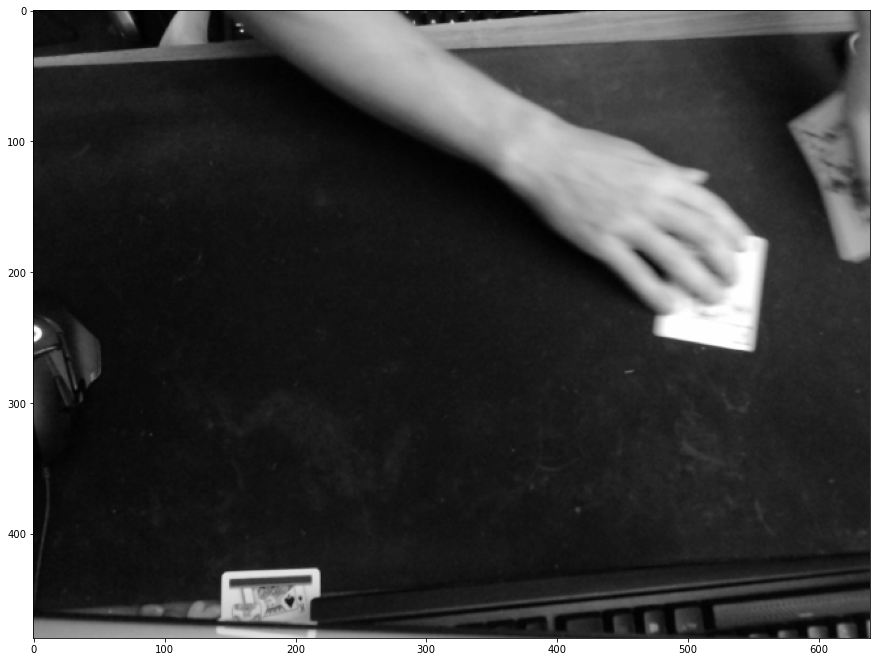

In [27]:
plt.figure(figsize=(15,15))
plt.imshow(card_mean_array_reshaped[10,:],  cmap='gray')
plt.show()

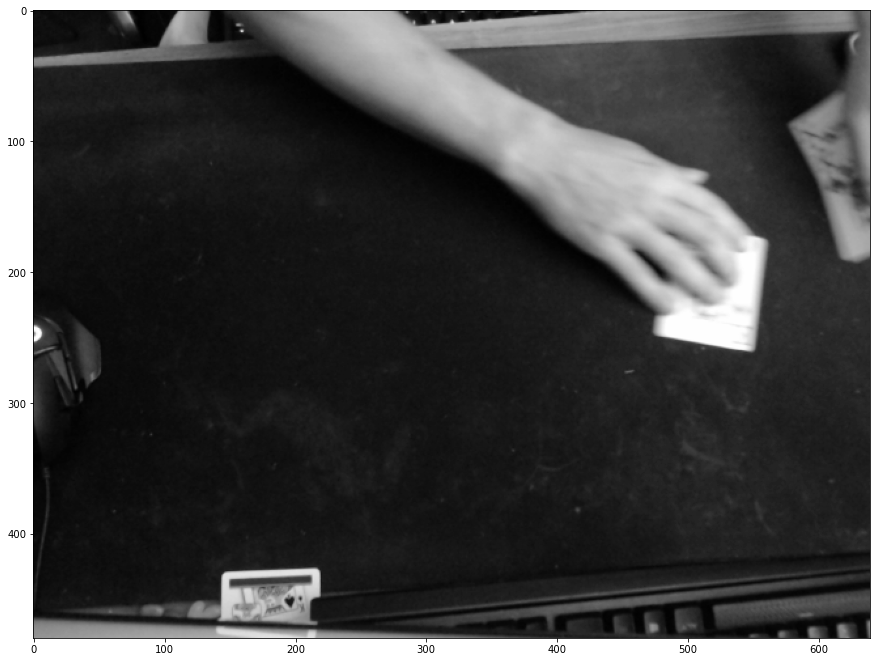

In [28]:
plt.figure(figsize=(15,15))
plt.imshow(card_max_array_reshaped[10,:],  cmap='gray')
plt.show()






In [ ]:
cap = cv2.VideoCapture('data/will_pitching/Changeups /IMG_0132_MOV.mp4')
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

fc = 0
ret = True

while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1

cap.release()

cv2.namedWindow('frame 10')
cv2.imshow('frame 10', buf[9])


In [ ]:
cap = cv2.VideoCapture('data/will_pitching/Changeups /IMG_0132_MOV.mp4')
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

fc = 0

while True:
    ret, frame = cap.read()
    fc += 1

    cv2.imshow('Test Frames', frame)

    #waits to wuit out early of function
    if cv2.waitKey(1) == ord('q'):
        break

#releases the video capture and cleans up from script
cap.release()
cv2.destroyAllWindows()